In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import fitsio as ft

random = ft.read('/B/Shared/Shadab/FA_LSS/FA_EZmock_desi_ELG_v0_rand_01.fits')
data = ft.read('/B/Shared/Shadab/FA_LSS/FA_EZmock_desi_ELG_v0_15.fits')
print('Random Columns : ', random.dtype.names)
print('Data Columns : ', data.dtype.names)


# print the percentiles
prcn = [0, 25, 50, 75, 100]
for name in ['Z', 'Z_COSMO', 'DZ_RSD']:
    print('{} 0-25-50-75-100% : {}'.format(name, np.percentile(data[name], prcn)))
    
print('{}% have negative Z (Z=-1)'.format(np.mean(data['Z']<0.0)))
            
      
# plot Z or Z_COSMO vs DZ_RSD
sample = np.random.choice(np.arange(data.size), size=1000)

Random Columns :  ('RA', 'DEC', 'Z_COSMO', 'DZ_RSD')
Data Columns :  ('RA', 'DEC', 'Z_COSMO', 'DZ_RSD', 'Z', 'PASS', 'epoch', 'year', 'TARGETID')
Z 0-25-50-75-100% : [-1.         -1.         -1.          0.9496901   1.91522396]
Z_COSMO 0-25-50-75-100% : [0.68439329 0.85819209 1.01401603 1.26500595 1.90750301]
DZ_RSD 0-25-50-75-100% : [-1.22060003e-02 -1.20900001e-03 -1.43999996e-05  1.18100003e-03
  1.18239997e-02]
0.5782474873322058% have negative Z (Z=-1)


(-0.01, 0.01)

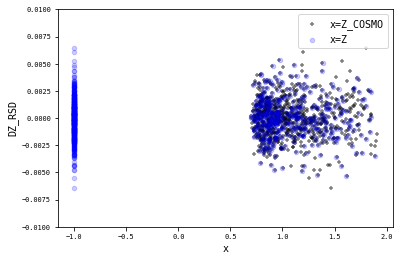

In [34]:
plt.scatter(data['Z_COSMO'][sample], data['DZ_RSD'][sample], 20, marker='+', color='k',
            label='x=Z_COSMO', alpha=0.5)
plt.scatter(data['Z'][sample],       data['DZ_RSD'][sample], 20, label='x=Z', 
            alpha=0.2, color='b')
plt.ylabel('DZ_RSD')
plt.legend()
plt.xlabel('x')
plt.ylim(-0.01, 0.01)

In [2]:
msample = np.zeros(data.size, '?')
msample[sample] = True

Text(0, 0.5, 'DZ_RSD')

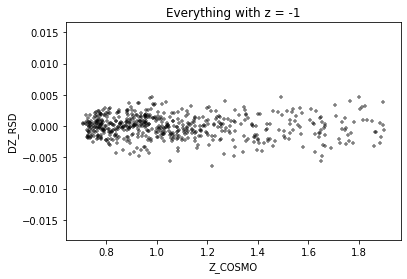

In [15]:
neg = (data['Z'] < 0) & msample
plt.title('Everything with z = -1')
plt.scatter(data['Z_COSMO'][neg], data['DZ_RSD'][neg], 20, marker='+', color='k', alpha=0.5)
plt.xlabel('Z_COSMO')
plt.ylabel('DZ_RSD')

In [3]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

In [4]:
plt.rc('font',  family='monospace')
plt.rc('xtick', labelsize='x-small')
plt.rc('ytick', labelsize='x-small')

In [5]:
ls /home/mehdi/data/mocksys/

SyntaxError: invalid syntax (<ipython-input-5-c29c4cac3aa6>, line 1)

In [6]:
file = lambda r, s: np.loadtxt('/home/mehdi/data/mocksys/pk_v0_15_'+r+'_'+str(s)+'_0.2.txt')

In [7]:
shotnoise = {'real':{0:2924.590646, 1:3521.658407},
             'red':{0:2924.330756, 1:3521.290893}}
colors = {'real':'k', 'red':'r'}
ls = {0:'-', 1:'--'}

2924.330756
3521.290893
2924.590646
3521.658407


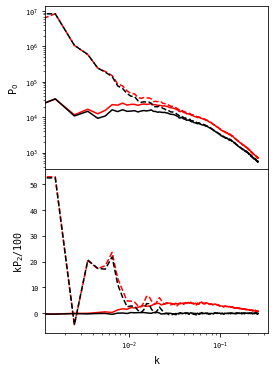

In [8]:
fig, ax = plt.subplots(nrows=2, figsize=(4, 6), sharex=True)
fig.subplots_adjust(hspace=0.)
for r in ['red', 'real']:
    for i in [0, 1]:       
        print(shotnoise[r][i])
        kpk = file(r, i)
        ax[0].plot(kpk[:, 0], 
                 kpk[:, 1]-shotnoise[r][i],
                 color=colors[r],
                 ls=ls[i])
        
        ax[1].plot(kpk[:, 0], 
                  kpk[:, 0]*kpk[:, 2]/100,
                  color=colors[r],
                  ls=ls[i])

ax[0].set(ylabel=r'P$_{0}$', yscale='log', 
          xscale='log')
ax[1].set(xlabel='k', ylabel=r'kP$_{2}$/100')
plt.savefig('kpk.pdf')